In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc
from pyDOE import *
import os
from scipy.stats import norm

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text yticklabel objects>)

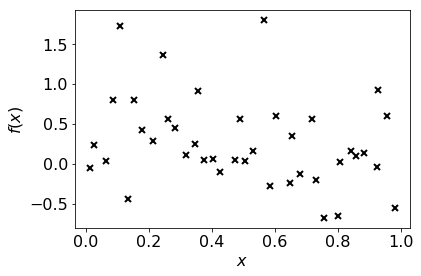

In [2]:
dim = 8
n = 10
noise=0
sigma = eval('lambda x: ' + str(noise))

X = np.load('../data/X_init_8d_40.npy')
Xnorm = (X - 0.5) /0.5
Y = np.load('../data/Y_init_8d_40.npy') [:, 1][:, None]
fig, ax = plt.subplots()
ax.plot(X[:, 7], Y, 'x', markeredgewidth=2, color='black')
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$f(x)$', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [3]:
kerns_list = [gpflow.kernels.RBF(1), gpflow.kernels.RBF(1), gpflow.kernels.RBF(1),
             gpflow.kernels.RBF(1), gpflow.kernels.RBF(1), gpflow.kernels.RBF(1),
             gpflow.kernels.RBF(1), gpflow.kernels.RBF(1)]
mean_funcs_list = [gpflow.mean_functions.Constant(-2), gpflow.mean_functions.Constant(-2),
                  gpflow.mean_functions.Constant(-2), gpflow.mean_functions.Constant(-2),
                  gpflow.mean_functions.Constant(-2), gpflow.mean_functions.Constant(-2),
                  gpflow.mean_functions.Constant(-2), gpflow.mean_functions.Constant(-2)]
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()

In [4]:
print kerns_list
print '\n'
print mean_funcs_list

[<gpflow.kernels.RBF object at 0x1a15372290>, <gpflow.kernels.RBF object at 0x1a15372350>, <gpflow.kernels.RBF object at 0x1a153724d0>, <gpflow.kernels.RBF object at 0x1a153725d0>, <gpflow.kernels.RBF object at 0x1a15372690>, <gpflow.kernels.RBF object at 0x1a15372750>, <gpflow.kernels.RBF object at 0x1a15372810>, <gpflow.kernels.RBF object at 0x1a153728d0>]


[<gpflow.mean_functions.Constant object at 0x1a15372250>, <gpflow.mean_functions.Constant object at 0x1a15372a10>, <gpflow.mean_functions.Constant object at 0x1a15372a90>, <gpflow.mean_functions.Constant object at 0x1a15372b10>, <gpflow.mean_functions.Constant object at 0x1a15372b90>, <gpflow.mean_functions.Constant object at 0x1a15372c10>, <gpflow.mean_functions.Constant object at 0x1a15372c90>, <gpflow.mean_functions.Constant object at 0x1a15372d10>]


In [5]:
m = hetero_gpmc.GPMCAdaptiveLengthscaleMultDimDev(Xnorm, Y, kerns_list, nonstat, mean_funcs_list)

In [6]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp_multdim.V,[[ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.] [ 0. 0. 0. 0. 0. 0. 0. 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.V4,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.kerns_list.item0.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item0.variance,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item1.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item1.variance,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item2.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item2.variance,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item3.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp_multdim.kerns_list.item3.variance,[ 1.],None,+ve


In [7]:
for i in xrange(dim):
    m.kerns_list[i].lengthscales.prior = gpflow.priors.Gamma(1., 1.)
    m.kerns_list[i].variance.prior = gpflow.priors.Gamma(1., 1.)
    #m.mean_funcs_list[i].c = -2.
    #m.mean_funcs_list[i].c.fixed = True 
    
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 2.)
m.likelihood.variance = 1e-6
m.likelihood.variance.fixed = True

In [8]:
m.optimize(maxiter=500) # start near MAP

      fun: array([ 118.07822817])
 hess_inv: <385x385 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.06465258e-09,   1.06139929e-10,   5.98260267e-10,
         5.26541115e-09,   1.19777307e-09,   4.90551521e-10,
         1.32501957e-10,   1.39822179e-09,   5.95011206e-10,
        -1.97733219e-12,   5.26019777e-10,   2.25360996e-09,
         6.05741753e-10,   1.63667295e-11,  -5.70486668e-12,
        -8.42957583e-11,  -1.47051363e-10,   1.92943129e-12,
         1.11707604e-11,   5.10307784e-10,  -8.18847668e-11,
        -1.16751685e-10,   4.59233818e-12,   5.10812070e-11,
        -1.00831509e-09,   1.05953155e-11,   1.24464958e-10,
        -7.59047897e-10,  -6.38780543e-10,  -9.35216449e-12,
         1.72695940e-12,  -1.64858894e-11,  -5.40041208e-10,
        -1.79726522e-12,  -5.46814123e-11,   3.37400328e-12,
         1.93211343e-10,   9.39942765e-11,   3.33843438e-12,
         4.20311309e-11,   6.71397972e-12,   2.09656437e-12,
         3.87396562e-11,  -1.24177147e-10

In [9]:
m

In [10]:
mcmc_samples = 1000
num_samp_gp = 1

In [11]:
samples = m.sample(mcmc_samples, verbose=True, epsilon=0.00005, thin = 2, burn = 500, Lmax = 20)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  99.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  97.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  99.0 %
Iteration:  1000 	 Acc Rate:  99.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  99.0 %
Iteration:  1300 	 Acc Rate:  99.0 %
Iteration:  1400 	 Acc Rate:  99.0 %
Iteration:  1500 	 Acc Rate:  98.0 %
Iteration:  1600 	 Acc Rate:  99.0 %
Iteration:  1700 	 Acc Rate:  100.0 %
Iteration:  1800 	 Acc Rate:  100.0 %
Iteration:  1900 	 Acc Rate:  99.0 %
Iteration:  2000 	 Acc Rate:  98.0 %


In [12]:
kernel0_samples = m.kerns_list[0].get_samples_df(samples)
kernel1_samples = m.kerns_list[1].get_samples_df(samples)
kernel2_samples = m.kerns_list[2].get_samples_df(samples)
kernel3_samples = m.kerns_list[3].get_samples_df(samples)
kernel4_samples = m.kerns_list[4].get_samples_df(samples)
kernel5_samples = m.kerns_list[5].get_samples_df(samples)
kernel6_samples = m.kerns_list[6].get_samples_df(samples)
kernel7_samples = m.kerns_list[7].get_samples_df(samples)

In [13]:
kernel0_samples.mean()

adaptive_lengthscale_gp_multdim.kerns_list.item0.lengthscales    0.664091
adaptive_lengthscale_gp_multdim.kerns_list.item0.variance        0.668783
dtype: float64

In [14]:
kernel0_samples.std()

adaptive_lengthscale_gp_multdim.kerns_list.item0.lengthscales    0.005376
adaptive_lengthscale_gp_multdim.kerns_list.item0.variance        0.007352
dtype: float64

In [15]:
kernel1_samples.mean()

adaptive_lengthscale_gp_multdim.kerns_list.item1.lengthscales    0.671758
adaptive_lengthscale_gp_multdim.kerns_list.item1.variance        0.661860
dtype: float64

In [16]:
kernel1_samples.std()

adaptive_lengthscale_gp_multdim.kerns_list.item1.lengthscales    0.005336
adaptive_lengthscale_gp_multdim.kerns_list.item1.variance        0.004906
dtype: float64

In [17]:
kernel2_samples.mean()

adaptive_lengthscale_gp_multdim.kerns_list.item2.lengthscales    0.665835
adaptive_lengthscale_gp_multdim.kerns_list.item2.variance        0.667909
dtype: float64

In [18]:
kernel2_samples.std()

adaptive_lengthscale_gp_multdim.kerns_list.item2.lengthscales    0.007266
adaptive_lengthscale_gp_multdim.kerns_list.item2.variance        0.008160
dtype: float64